> ## Task 1: Sentiment Analysis on Product Reviews





**1. Import Libraries**

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud

os.makedirs("outputs", exist_ok=True)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**2. Load Dataset Example: IMDB Reviews from CSV**

In [3]:
df = pd.read_csv("/content/IMDB_Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


**3. Preprocessing Function**

In [4]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

df['clean_text'] = df['review'].apply(preprocess)

**4. Train-Test Split**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['sentiment'], test_size=0.2, random_state=42
)

**5. Vectorization**

In [6]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**6. Logistic Regression Model**

In [7]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)
y_pred_lr = log_reg.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8881
              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**7. Naive Bayes Model (Bonus)**

In [8]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8507
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



**8. Visualization - WordClouds**

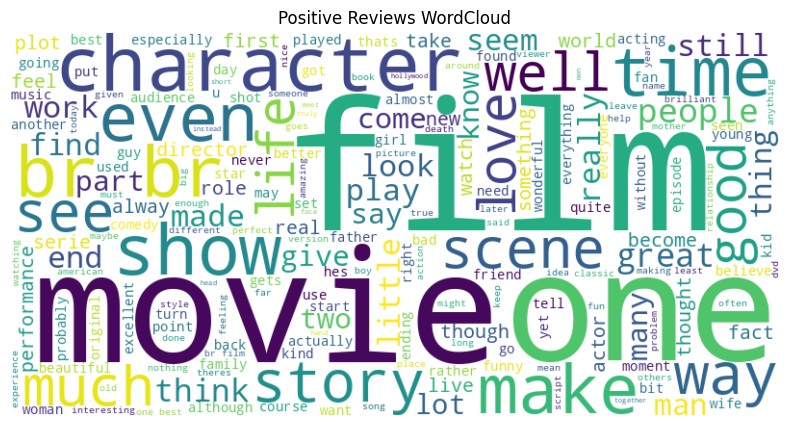

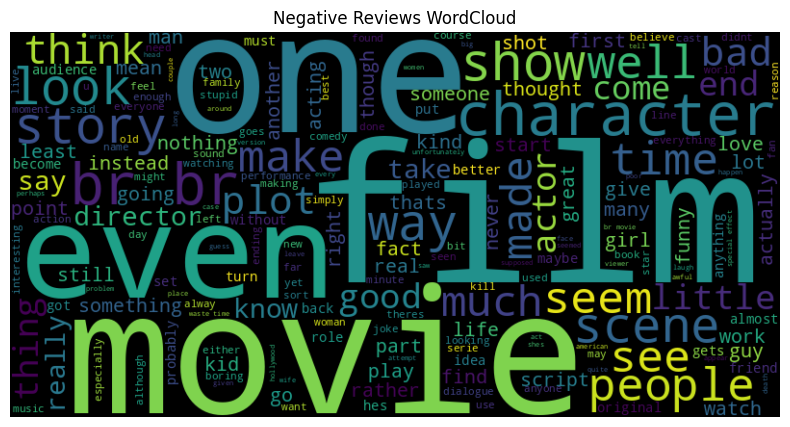

In [13]:
pos_text = " ".join(df[df['sentiment'] == 'positive']['clean_text'])
neg_text = " ".join(df[df['sentiment'] == 'negative']['clean_text'])

pos_wc = WordCloud(width=800, height=400, background_color="white").generate(pos_text)
neg_wc = WordCloud(width=800, height=400, background_color="black").generate(neg_text)

pos_wc.to_file("outputs/wordcloud_pos.png")
neg_wc.to_file("outputs/wordcloud_neg.png")

plt.figure(figsize=(10,5))
plt.imshow(pos_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews WordCloud")
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(neg_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews WordCloud")
plt.show()